# 주성분 분석(PCA)
## 차원축소를 통한 분류문제 예측

In [ ]:
#와인 데이터셋 업로드
#[Ref]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
data.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
print(data.frame.shape)
print(data.frame['target'].unique())

(178, 14)
[0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target #와인품종(클래스)

#전체 data를 학습/시험 데이터셋으로 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# PCA를 통한 데이터 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=4) #주성분: 4개
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
# 차원축소데이터로 로지스틱회귀 학습 및 테스트
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

0.9758064516129032
0.9629629629629629
[[18  0  0]
 [ 2 19  0]
 [ 0  0 15]]


# 주성분 분석(PCA)
## 주성분 개수 선정

In [ ]:
#와인 데이터셋 업로드
#[Ref]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target #와인품종(클래스)

#전체 data를 학습/시험 데이터셍으로 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
import numpy as np

cov=np.cov(X_train_std.T) #Covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov) #eigenvalues, eigenvectors
print('Eigenvalues: \n%s' % eigen_vals)

Eigenvalues: 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


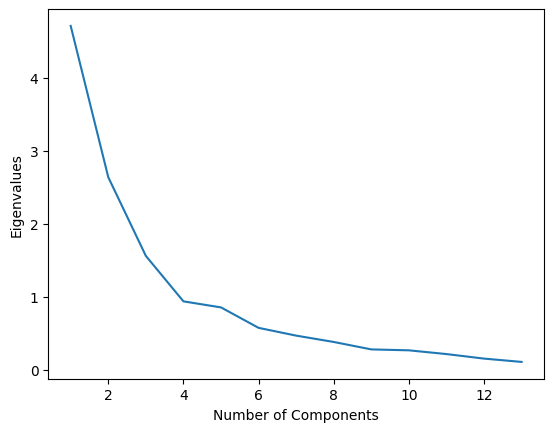

In [ ]:
import matplotlib.pyplot as plt

#Elbow point 선정하기
plt.plot(range(1,len(eigen_vals)+1), sorted(eigen_vals, reverse=True))
plt.ylabel('Eigenvalues')
plt.xlabel('Number of Components');

분산비중:  [0.359, 0.201, 0.119, 0.071, 0.065, 0.044, 0.035, 0.029, 0.021, 0.02, 0.016, 0.011, 0.008]


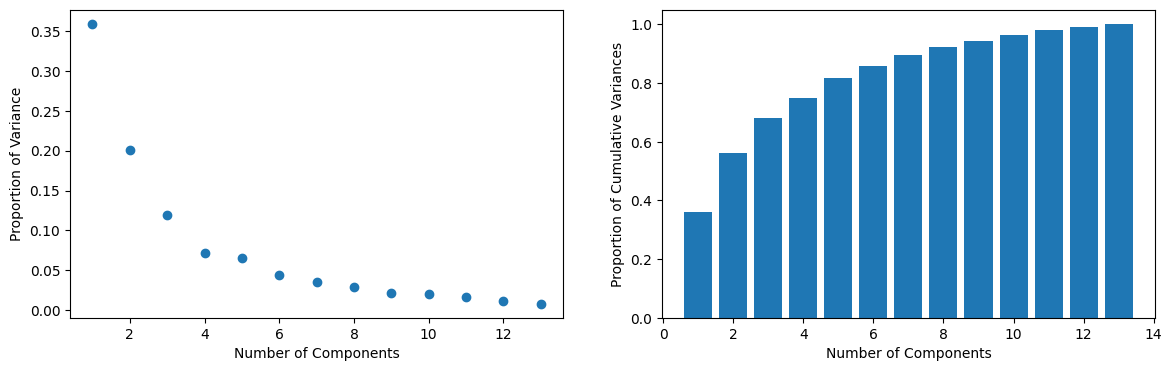

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#분산비중 고려하기
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
print('분산비중: ', list(map(lambda x: round(x,3), var_exp)))

fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].scatter(range(1,len(eigen_vals)+1), var_exp)
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Proportion of Variance')

axes[1].bar(range(1,len(eigen_vals)+1), np.cumsum(var_exp))
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Proportion of Cumulative Variances');